#                                                 <span style="color:purple">**Series de Fourier**</span>

##### Autor: Carlos Keleanderson Pereira da Silva

#### Sabemos que a séride de fourier pode se escrita da seguinte forma:
 #                       $f(x) = \sum_{k=0}^{\infty}a_k\cos(k\frac{2\pi x}{L})+b_k\sin(k\frac{2\pi x}{L})$
#### Sendo:
#                        $a_k = \frac{2}{L}\int_{-L/2}^{L/2}f(x)\cos(\frac{k \pi t}{L})dx$
#                        $b_k = \frac{2}{L}\int_{-L/2}^{L/2}f(x)\sin(\frac{k\pi t}{L})dx$

#### O primeiro método que vamos utilizar é a partir de bibliotecas pré prontas em python. A principal delas é a biblioteca sympy que trabalha com simbólicos, além de ter um bom ferramental de calculo e, no presente arquivo, de séries de Fourier. Por isso escolhi primeiro trabalhar desta forma; acredito que fique mais intuitivo, principalmente para quem está começando a estudar Fourier.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import symbols, fourier_series, lambdify
from sympy.plotting import plot
from ipywidgets import interact

In [13]:
x = symbols('x') # a variável x é simbólica

#iniciando a figura ao qual o grafico irá ser plotado
fig = plt.figure(figsize=(15,15)) # setando onde irá ser desenhado cada frame do gráfico
axis = plt.axes(xlim=(-np.pi-1,np.pi+1), ylim=(-4.5,4.5),xlabel='$t$',ylabel='$f(t)$') #definindo algumas preferencias
line, = axis.plot([],[],lw=2, color='b') # setando as preferências da primeira curva
line2, = axis.plot([],[],lw=2,color='r') # setando as preferências da segunda curva
axis.grid() #setando grid 

xp = np.linspace(-12,12,1000) # vetor x no qual será plotado as funções

#criando a função init() para inicializar a animação
def init():
    line.set_data([],[])
    line2.set_data(xp,xp)
    return line, line2

# função iterativa de animação
def animate_fourier(k):
    s1 = fourier_series(x, (x,-np.pi,np.pi)).truncate(k)
    f1 = lambdify(x,s1,'numpy')
    plt.title('Série de Fourier com N = {} termos'.format(k), fontsize=16, color='b')
    line.set_data(xp,f1(xp))
    
    return line,

# definido os parâmetros da animação 
#anim = FuncAnimation(fig, animate_fourier, init_func=init,frames=20,interval=500,blit=True)
#anim.save('Fourier1.mp4', writer='ffmpeg') #Salvando a animação

#### Vamos agora tentar fazer o algoritmo da série de fourier utilizando a noção de produto interno para calcular os coeficientes $a_n$ e $b_n$ ( ou $a_k$ e $b_k$; depende da bibliografia).

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

#### Primeiro nós vamos definir uma função qualquer. Fique livre para editar ou fazer sua própria função. Aqui eu pus 3 funções testes que podem ser observadas fazendo um simples plot

In [15]:
def func_fourier(x):
    f = []
    for i in x:
        if i>=-np.pi and i<0:
            f.append(1/np.pi*i+1)
        elif i<=np.pi and i>=0:
            f.append(-1/np.pi*i+1)
        else:
            f.append(0)
    return f

def func_fourier2(x):
    f = []
    for i in x:
        if i>=-1 and i<=1:
            f.append(1)
        else:
            f.append(0)
    return f

def func_fourier3(x):
    f =[]
    for i in x:
        if i<0 and i>=-1:
            f.append(-1)
        elif i>=0 and i<=1:
            f.append(1)
        else:
            f.append(0)
    return f


#### Logo abaixo vamos criar o algorítmo padrão encontrar a Série de Fourier (que estará na variável FS) com n termos escolhidos no argumento da função range() que está no for loop.

In [16]:
# Aqui vamos encontrar a série de fourier Para uma onda triangular como já vista acima.
dx = 0.001
L = 2*np.pi
x = np.arange(-L,L,dx)
f = func_fourier(x)

a0 = (2/L)*np.sum(f * np.ones_like(x))*dx
FS = a0/2

for n in range(5):
    an = (2/L)*np.sum(f * np.cos((n+1)*2*np.pi*x/L))*dx
    bn = (2/L)*np.sum(f * np.sin((n+1)*2*np.pi*x/L))*dx
    FS += an*np.cos((n+1)*2*np.pi*x/L)+bn*np.sin((n+1)*2*np.pi*x/L)



In [17]:
plt.plot(x,FS,x,f)

In [18]:
dx = 0.001
L = 2*2
x = np.arange(-2*L,2*L,dx)
f = func_fourier2(x)

a0 = (2/L)*np.sum(f * np.ones_like(x))*dx
FS = a0/2

for n in range(3):
    an = (2/L)*np.sum(f * np.cos((n+1)*2*np.pi*x/L))*dx
    bn = (2/L)*np.sum(f * np.sin((n+1)*2*np.pi*x/L))*dx
    FS += an*np.cos((n+1)*2*np.pi*x/L)+bn*np.sin((n+1)*2*np.pi*x/L)



In [19]:
plt.plot(x,FS,x,f)

In [20]:
n_points = 200
Ts = 4

x1 = np.linspace(-Ts/2,Ts/2,n_points)

f = func_fourier2(x1)
freqs = fftfreq(n_points,(Ts/2-(-Ts/2))/n_points)
marcador = freqs>=0
p_fft = fft(f)
p2_fft = 2.*np.abs(p_fft)/n_points

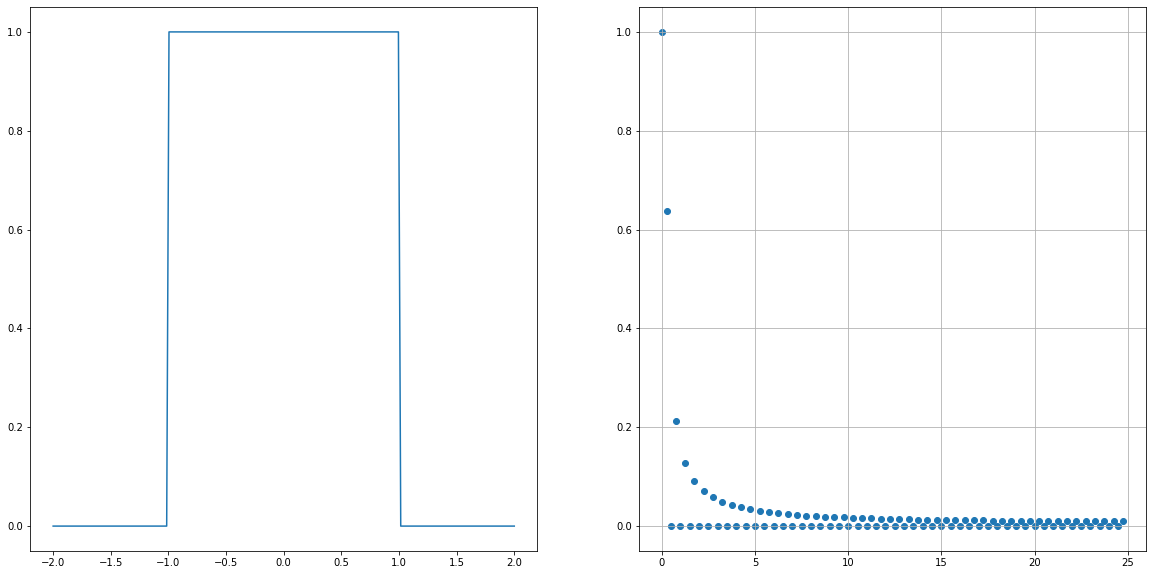

In [21]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
ax[1].grid()
ax[0].plot(x1,f)
ax[1].scatter(freqs[marcador],p2_fft[marcador])

#### Fazer uma vizualisação de Fourier

In [22]:
def coef_fourier(termo,func,sample=200,limites=[-np.pi,np.pi]):
    """
    Essa função deve retornar o módulo e o angulo de um termo de uma transformada de fourier
    """
    
    func_fft = 2*np.abs(np.fft.fft(func))/sample
    freq = np.fft.fftfreq(sample,(limites[1]-limites[0])/sample)
    
    return [func_fft[termo],freq[termo]]
    

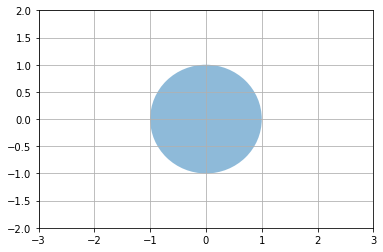

In [23]:
fig, axis = plt.figure(), plt.axes()

circulo = plt.Circle((0,0),coef_fourier(0,f,limites=[-2,2])[0],alpha = 0.5)
axis.add_artist(circulo)
axis.set_xlim(-3,3)
axis.set_ylim(-2,2)
axis.grid()